# Background and Problem formulation
**<font size = 4>1. What is customer churn? Why it is important? What is the solution and challenge? </font>**

<font size = 4>A telecom company provides telephone and wireless services, as well as internet data and other related services. Customer churn is defined as that a customer discontinues the service within the last month. Customer churn causes a loss of revenue. Therefore, the marketing team sends retention promotions to the potentially churning customers to retain them, but have problems efficiently finding the churning customers and the reasons why they churn.</font>

**<font size = 4>2. Objectives:</font>**

<font size = 4>A. Predict whether a customer will churn next month; B. Figure out the factors resulting in customer churn.</font>

# 0. Load Libararies and Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('Telecom_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Exploratory Data Analysis (EDA)

## 1.0 Data Overview

In [5]:
df.info()
# Get information for each column and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
# 'TotalCharges' should be a number instead of string, convert it to number and find some missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df[df.TotalCharges.isnull()==1]
# The reason of the missing values in 'TotalCharges' column is that the tenure(# of service months since sign-up) is 0，
# indicates that they are new customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
df.TotalCharges = df.TotalCharges.fillna(0)
# Manually imputing 0 for the missing values in 'TotalCharges'
# Nomally missing data handling is in Feature Engineering Section, fill the NaNs here for the convenience of EDA visulization

## 1.1 Target Column: Churning Rate

<Axes: ylabel='Churn'>

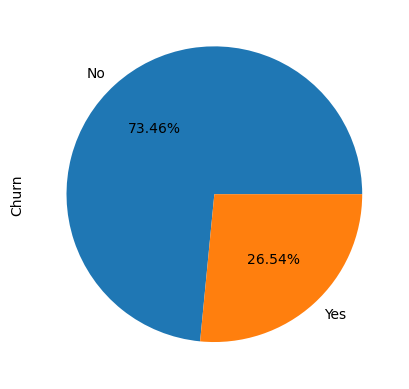

In [9]:
df.Churn.value_counts().plot(kind='pie',autopct=lambda p: '{:.2f}%'.format(p))
# The churning rate: 26.54%

## 1.2 Features of Demographic Informations

**<font size = 4>Visuliazation of features that involving demographic info of the customers</font>**

In [10]:
df_y = df[df['Churn']=='Yes']
df_n = df[df['Churn']=='No']

churn_female = len(df_y[df_y['gender']=='Female'])
churn_male = len(df_y[df_y['gender']=='Male'])
churn_Senior = len(df_y[df_y['SeniorCitizen']==1])
churn_notSenior = len(df_y[df_y['SeniorCitizen']==0])
churn_Partner = len(df_y[df_y['Partner']=='Yes'])
churn_noPartner = len(df_y[df_y['Partner']=='No'])
churn_Depen = len(df_y[df_y['Dependents']=='Yes'])
churn_noDepen = len(df_y[df_y['Dependents']=='No'])
churn = [churn_female,churn_male,0,churn_Senior,churn_notSenior,0,
         churn_Partner,churn_noPartner,0,churn_Depen,churn_noDepen]

noChurn_female = len(df_n[df_n['gender']=='Female'])
noChurn_male = len(df_n[df_n['gender']=='Male'])
noChurn_Senior = len(df_n[df_n['SeniorCitizen']==1])
noChurn_notSenior = len(df_n[df_n['SeniorCitizen']==0])
noChurn_Partner = len(df_n[df_n['Partner']=='Yes'])
noChurn_noPartner = len(df_n[df_n['Partner']=='No'])
noChurn_Depen = len(df_n[df_n['Dependents']=='Yes'])
noChurn_noDepen = len(df_n[df_n['Dependents']=='No'])
noChurn = [noChurn_female,noChurn_male,0,noChurn_Senior,noChurn_notSenior,0,
         noChurn_Partner,noChurn_noPartner,0,noChurn_Depen,noChurn_noDepen]

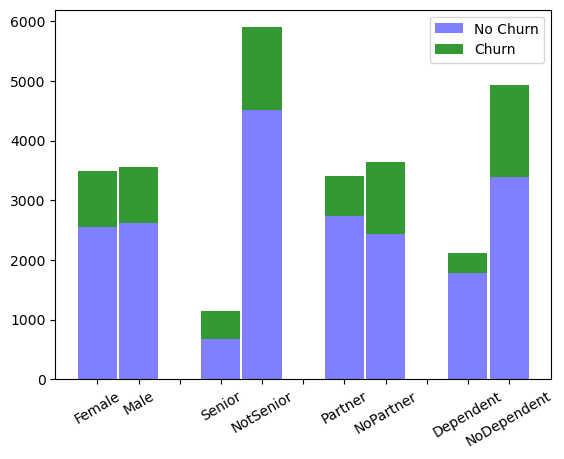

In [11]:
X = ['Female','Male',' ','Senior','NotSenior','  ','Partner','NoPartner','   ','Dependent','NoDependent']
plt.bar(X,noChurn,color = 'blue',width=0.95, alpha = 0.5)
plt.bar(X,churn,color = 'green', bottom = noChurn,width=0.95,alpha = 0.8)
plt.xticks(rotation = 30)
plt.legend(['No Churn','Churn'])
plt.rcParams['figure.figsize'] = (9,6.5)


**<font size = 4>Observations:</font>**

<font size = 4>1. Little difference on churning rate is shown between female and male.</font>

<font size = 4>2. Only a small part of our customers are senior, but they are with high probability to churn.</font>

<font size = 4>3. Customers with dependents tend to keep the service.</font>

## 1.3 Features of Enrolled Services

**<font size = 4>Visuliazation of features of enrolled services</font>**

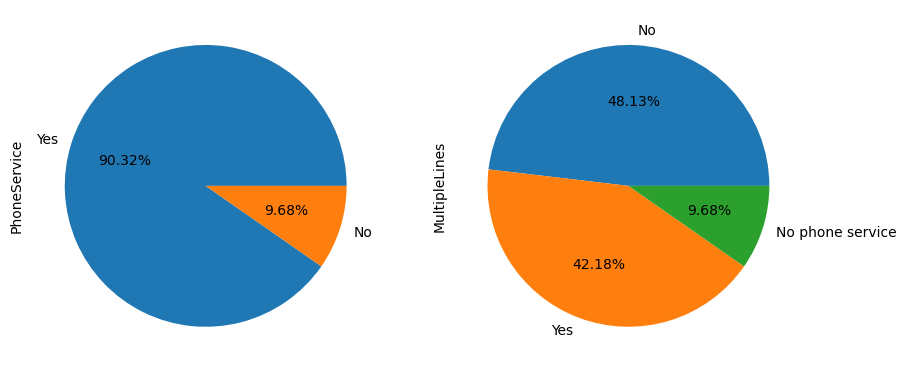

In [12]:
phone = ['PhoneService','MultipleLines']

fig, axs = plt.subplots(nrows = 1, ncols = 2)
for i in range(len(phone)):
    df[phone[i]].value_counts().plot(kind='pie',ax=axs[i],figsize=(10, 5), 
                                        autopct=lambda p: '{:.2f}%'.format(p))

**<font size = 4>Observations:</font>**

<font size = 4>These two features have overlapping, i.e., 'PhoneService'=='No'(9.68% in total population) equals 'MultipleLines'=='No phone service'.</font>


<Axes: ylabel='InternetService'>

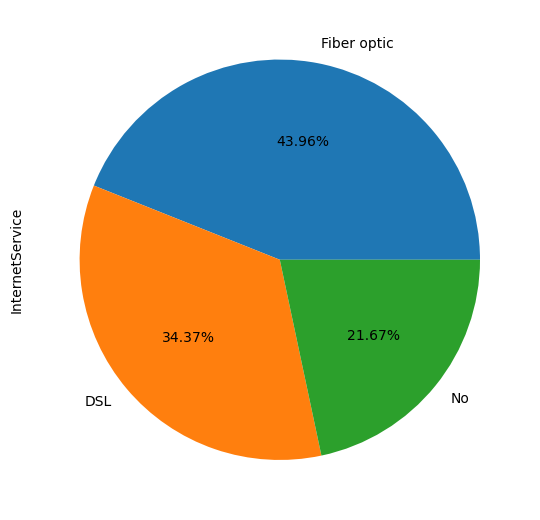

In [13]:
df.InternetService.value_counts().plot(kind='pie',autopct=lambda p: '{:.2f}%'.format(p))

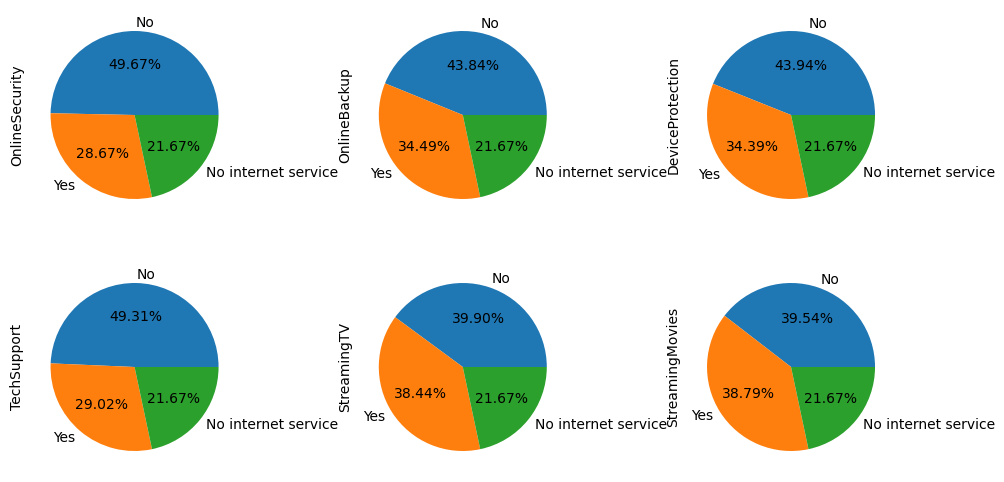

In [14]:
internet = ['OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies']

fig, axs = plt.subplots(nrows = 2, ncols = 3)
for i in range(len(internet)):
    df[internet[i]].value_counts().plot(kind='pie',ax=axs[i//3,i%3],figsize=(12, 6), 
                                        autopct=lambda p: '{:.2f}%'.format(p))

**<font size = 4>Observations:</font>**

<font size = 4>Similar to phone service, there are also overlappings between the internet services, i.e., 'InternetService' == 'No'(21.67% in total population) equals 'No internet service' in the other features of internetservice. These redundent variables will be transferred and reduced while doing the feature engineering.</font>


## 1.4 Features of Contract Information

**<font size = 4>Visuliazation of features of contract info</font>**

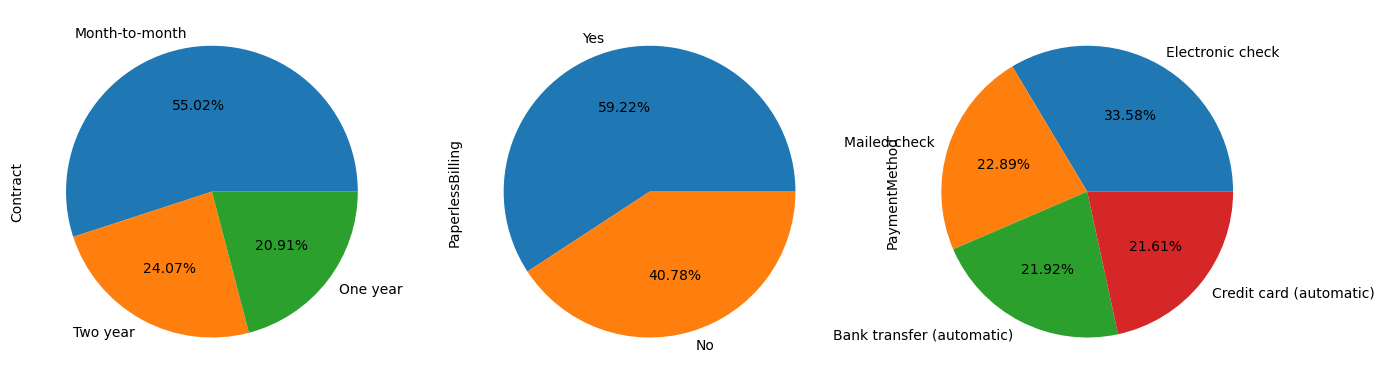

In [15]:
plan_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axs = plt.subplots(nrows = 1, ncols = 3)
for i in range(len(plan_info)):
    df[plan_info[i]].value_counts().plot(kind='pie',ax=axs[i],figsize=(16, 6),
                                        autopct=lambda p: '{:.2f}%'.format(p))

In [16]:
Churn_m = len(df_y[df_y['Contract']=='Month-to-month'])
Churn_1y = len(df_y[df_y['Contract']=='One year'])
Churn_2y = len(df_y[df_y['Contract']=='Two year'])

Churn_paperless = len(df_y[df_y['PaperlessBilling']=='Yes'])
Churn_not_paperless = len(df_y[df_y['PaperlessBilling']=='No'])

Churn_mailedcheck = len(df_y[df_y['PaymentMethod']=='Mailed check'])
Churn_electroniccheck = len(df_y[df_y['PaymentMethod']=='Electronic check'])
Churn_bank = len(df_y[df_y['PaymentMethod']=='Bank transfer (automatic)'])
Churn_creditcard = len(df_y[df_y['PaymentMethod']=='Credit card (automatic)'])


churn = [Churn_m,Churn_1y,Churn_2y,
         0,Churn_paperless,Churn_not_paperless,
         0,Churn_mailedcheck,Churn_electroniccheck,Churn_bank,Churn_creditcard]

noChurn_m = len(df_n[df_n['Contract']=='Month-to-month'])
noChurn_1y = len(df_n[df_n['Contract']=='One year'])
noChurn_2y = len(df_n[df_n['Contract']=='Two year'])

noChurn_paperless = len(df_n[df_n['PaperlessBilling']=='Yes'])
noChurn_not_paperless = len(df_n[df_n['PaperlessBilling']=='No'])

noChurn_mailedcheck = len(df_n[df_n['PaymentMethod']=='Mailed check'])
noChurn_electroniccheck = len(df_n[df_n['PaymentMethod']=='Electronic check'])
noChurn_bank = len(df_n[df_n['PaymentMethod']=='Bank transfer (automatic)'])
noChurn_creditcard = len(df_n[df_n['PaymentMethod']=='Credit card (automatic)'])

noChurn = [noChurn_m,noChurn_1y,noChurn_2y,
           0,noChurn_paperless,noChurn_not_paperless,
           0,noChurn_mailedcheck,noChurn_electroniccheck,noChurn_bank,noChurn_creditcard]

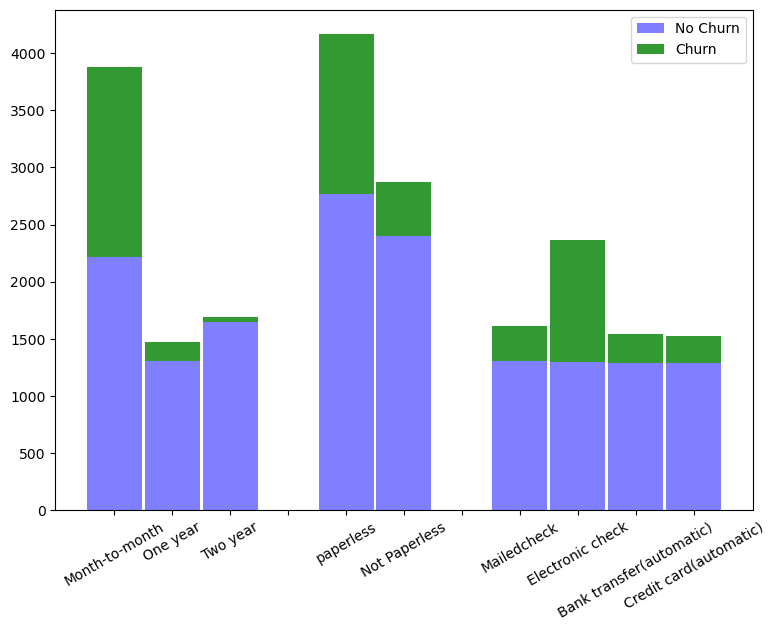

In [17]:
X = ['Month-to-month', 'One year','Two year',
     ' ','paperless','Not Paperless',
     '','Mailedcheck','Electronic check','Bank transfer(automatic)','Credit card(automatic)']

plt.bar(X,noChurn,color = 'blue',width=0.95, alpha = 0.5)
plt.bar(X,churn,color = 'green', bottom = noChurn,width=0.95,alpha = 0.8)
plt.xticks(rotation = 30)
plt.legend(['No Churn','Churn'])
plt.rcParams['figure.figsize'] = (12,6)

**<font size = 4>Observations:</font>**

<font size = 4>It is obvious that month-to-month contract gets much higher churning rate than the year by year contracts.</font>

<font size = 4>The payment method and whether use paperless do not show any trend.</font>

## 1.5 Numerical Features

**<font size = 4>tenure: </font>**<font size = 4>how many months since the customer sign up our service. </font>

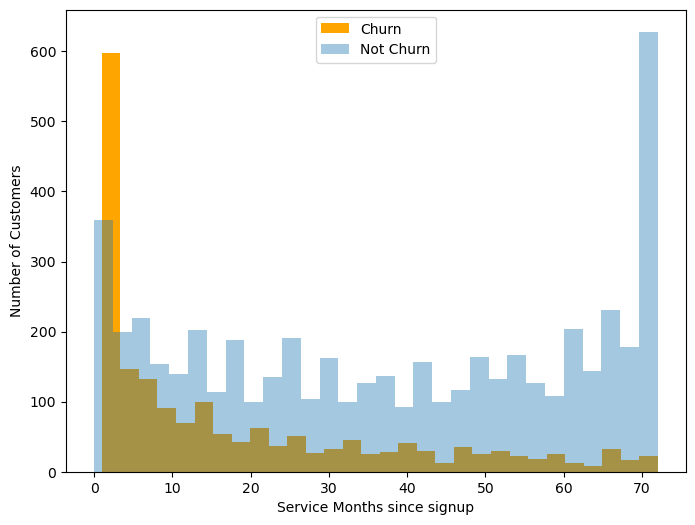

In [18]:
plt.figure(figsize=(8, 6))
df[df['Churn']=='Yes'].tenure.plot(kind='hist', bins=30, color='orange')
df[df['Churn']=='No'].tenure.plot(kind='hist', bins=30, alpha = 0.4)

plt.xlabel('Service Months since signup') 
plt.ylabel('Number of Customers')
plt.legend(['Churn','Not Churn'])
# plot the churn/not churn distribution based on the tenure month 

**<font size = 4>Observations:</font>**

<font size = 4>The tenure value varies from 0 to 72 months (6 years).</font>

<font size = 4>Customers with less than 2 years have very high probability to churn, while the extreme loyal customers (have stayed nearly 6 years) highly prefer to keep the service.</font>


**<font size = 4>MonthlyCharges: </font>**<font size = 4>how much was charged in last month. </font>

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

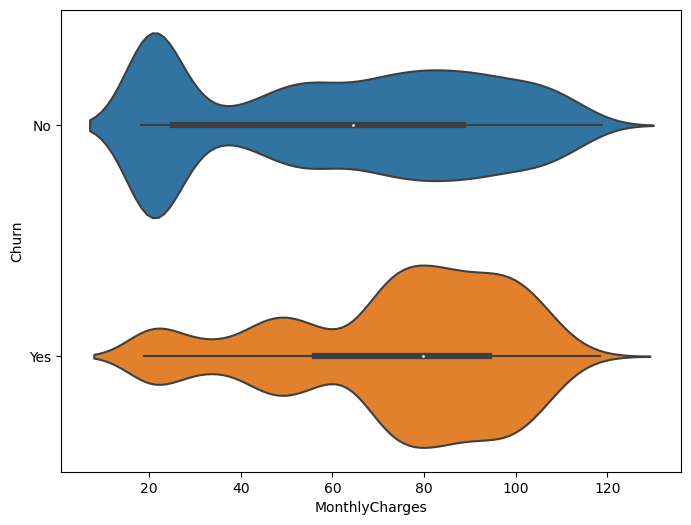

In [19]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='MonthlyCharges',y='Churn',data=df,scale='area')

**<font size = 4>Observations:</font>**

<font size = 4>Customers are very willing to stay when monthly charge at around 20 dollar, it is no doubt that a good discounted price will be attractive to customers. </font>

<font size = 4>High churning rate shows between the 70 dollars/month to 110 dollars/month.</font>


**<font size = 4>TotalCharges: </font>**<font size = 4>how much does the customer have paid since sign up </font>

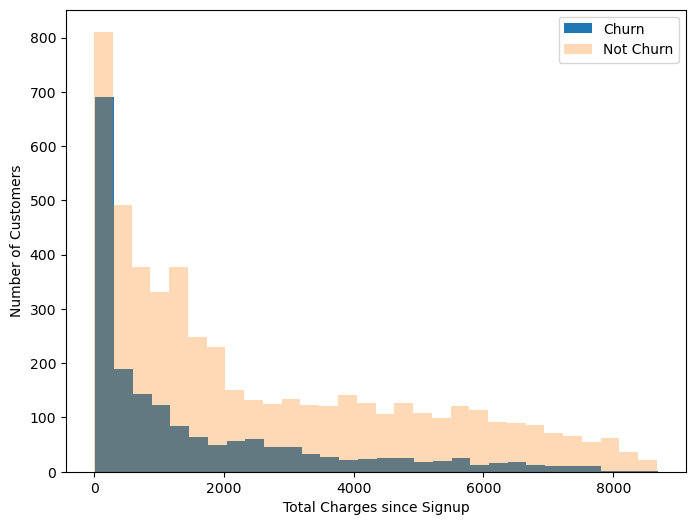

In [20]:
plt.figure(figsize=(8, 6))
df[df['Churn']=='Yes'].TotalCharges.plot(kind='hist', bins=30)
df[df['Churn']=='No'].TotalCharges.plot(kind='hist', bins=30, alpha = 0.3)

plt.xlabel('Total Charges since Signup')
plt.ylabel('Number of Customers') 
plt.legend(['Churn','Not Churn'])

**<font size = 4>Observations:</font>**

<font size = 4>Less total charge gets higher churning rate, this is consistent with the tenure months: generally speaking, less total charge indicates the customer stays in a short service period. </font>



**<font size = 5>Correlation between the numerical features</font>**

**<font size = 4>TotalCharges: </font>**<font size = 4>Get the correlation between the numerical features and the target. From domain knowledge, total charge should be monthly charge * tenure months, so a product of is calculated and compared with the actual total charge.</font>

In [21]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

df_num = df[['Churn','tenure','MonthlyCharges','TotalCharges']]
df_num['Churn'] = df_num['Churn'].map(lambda x: 1 if str(x) == 'Yes' else 0)
df_num['Total_cal'] = df_num['tenure']*df_num['MonthlyCharges']
df_num_corr = df_num.corr(method = 'pearson')
df_num_corr

,Churn,tenure,MonthlyCharges,TotalCharges,Total_cal
Churn,1.000000,-0.352229,0.193356,-0.198324,-0.198514
tenure,-0.352229,1.000000,0.247900,0.826178,0.826568
MonthlyCharges,0.193356,0.247900,1.000000,0.651174,0.651566
TotalCharges,-0.198324,0.826178,0.651174,1.000000,0.999561
Total_cal,-0.198514,0.826568,0.651566,0.999561,1.000000


<Axes: >

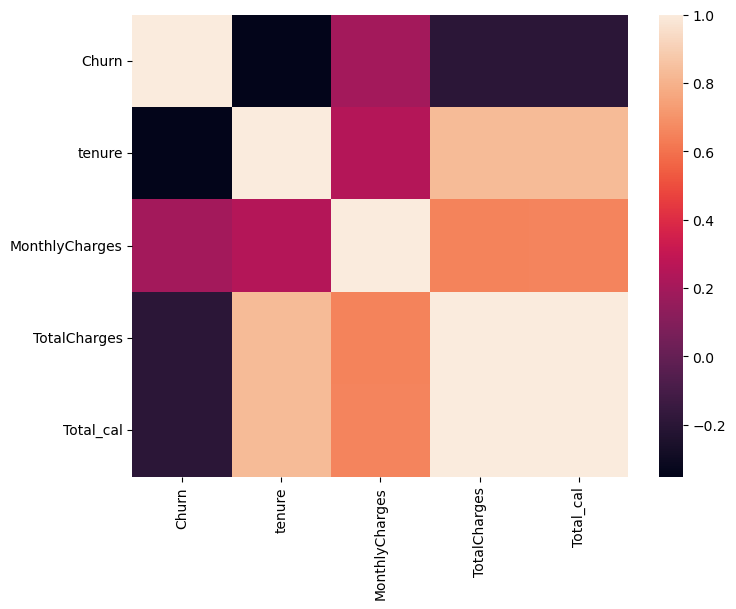

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr())

<font size = 4>As expected, TotalCharges and calculated MontlyCharges*TenureMonth get a correlation value of 0.99.</font>

<font size = 4>TotalCharges and tenure are highly correlated (0.83), TotalCharges and MonthlyCharges are also correlated (0.65), so 'TotalCharges' is considered as a redundent feature and will be dropped in the feature engineering.</font>



# 2. Feature Engineering

## 2.0 Encoding Categorical Variables

<font size = 4>For the categorical features with two unique values, transform them as 1 and 0 </font>

In [23]:
df1 = df.drop(columns = ['customerID'])
# The customerID does show any valuable information, so we just drop it.

df1['gender'] = df1['gender'].map(lambda x: 1 if str(x) == 'Male' else 0)
# Convert gender to dummy variables

df1['MultipleLines'] = df1['MultipleLines'].map(lambda x: 1 if str(x) == 'Yes' else 0)
# Conversion on 'MultipleLines'

internet_services = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']
for service in internet_services:
    df1[service] = df1[service].map(lambda x: 1 if str(x) == 'Yes' else 0)
# Conversion on Internet realated services 

features_yesorno = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn',]
for feature in features_yesorno:
    df1[feature] = df1[feature].map(lambda x: 1 if str(x) == 'Yes' else 0)
# Conversio on other features with only 'Yes' and 'No'

df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


<font size = 4>For the categorical features with more than two unique values, we transform them as dummy variables with each original value as a new column. </font>

In [24]:
df2 = pd.get_dummies(df1)
df2 = df2.drop(columns = 'InternetService_No')
# Drop the redundant feature, since 'InternetService_No' can be decided by 'InternetService_DSL' and 'InternetService_Fiber optic'
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0


## 2.1 Create new features

<font size = 4>Considering that more services enrolled may result less churns, we would like to create two features: 1. the total number of internet services; 2. whether phone service & internet service are both enrolled.</font>

In [25]:
df2['Number_of_InternetServices'] = df2[internet_services].sum(axis=1)
df2.Number_of_InternetServices.describe()
# View the statistic result of the number of signed internet services
# Customers would sign 2 internet related service in average

count    7043.000000
mean        2.037910
std         1.847682
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Number_of_InternetServices, dtype: float64

In [26]:
phone_internet = ['PhoneService','InternetService_DSL','InternetService_Fiber optic']
df2['Phone_Internet'] = df2[phone_internet].sum(axis=1)
df2['Phone_Internet'] = df2['Phone_Internet'].map(lambda x: 1 if x ==2 else 0)
df2.Phone_Internet.value_counts()
# About two thirds of customers have both phone and internet service

1    4835
0    2208
Name: Phone_Internet, dtype: int64

## 2.3 Numerical features

<font size = 4>As discussed in EDA, drop 'TotalCharges' as for the reason of high correlation.</font>

In [27]:
df3 = df2.drop(columns = ['TotalCharges'])

<font size = 4>Scale the numerical features in ensures all features have the same scale or range of values.</font>

In [28]:
features = list(df3.columns)
features.remove('Churn')
X = df3[features]
y = df3['Churn']
# Seperate features and target

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
# Use scaler to scale the numerical features to range(0,1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_of_InternetServices,Phone_Internet
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.166667,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0


<font size = 4>There are 26 features in total that are taken as orinigal features into the initial model selection</font>


# 3. Model Comparison and Tuning

## 3.0 Import libraries and split datasets

In [29]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# grid-search with cross validation is used to tune and find the best hyperparameters

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# import models

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, roc_curve, auc,classification_report
# import metrics


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
# Split dataset to train set and test set

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_of_InternetServices,Phone_Internet
6607,1.0,0.0,0.0,1.0,0.013889,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0
2598,0.0,0.0,0.0,0.0,0.097222,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.166667,1.0
2345,0.0,0.0,0.0,1.0,0.055556,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
4093,0.0,0.0,0.0,0.0,0.402778,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0
693,0.0,0.0,0.0,0.0,0.041667,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0


## 3.1 Model Comparison with default hyperparameter settings

<font size = 4>For this binary classification problem, the following models are considered and compared:</font>

**<font size = 4>Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGB, Support Vector Classifier(SVC)</font>**

<font size = 4>The following performance metrics are compared:</font>

<font size = 4> **Accuracy:** The proportion of correctly classified instances out of the total instances.

**Precision:** The ability of the model to correctly identify positive instances among all instances predicted as positive.

**Recall (Sensitivity or True Positive Rate):** The ability of the model to correctly identify all actual positive instances.
​

**F1 Score:** The harmonic mean of precision and recall. It balances precision and recall in a single metric.

**ROC_AUC (Area Under the Receiver Operating Characteristic):** The area under the ROC curve, which plots the true positive rate against the false positive rate at various threshold settings.</font>

<font size = 4>**These metrics provide different perspectives on the performance of a classification model, and the choice depends on the specific business context and goals of the analysis.**</font>



In [31]:
# This is a function to write all the metric scores of a model into the results for comparison

def score_summary(model_name,model,X_train,y_train,X_test,y_test,results):
    
    y_train_pred = model.predict(X_train)
    # Get predicted y value in training dataset using model
    if model_name != 'SVC':
        y_train_proba = model.predict_proba(X_train)
        # Get predicted probability for calculation of ROC-AUC for all other models
        # SVC Model does not return a probability, it only return a class label

    train_acc = round(accuracy_score(y_train, y_train_pred),3)
    train_pre = round(precision_score(y_train, y_train_pred),3)
    train_recall = round(recall_score(y_train, y_train_pred),3)
    train_f1 = round(f1_score(y_train, y_train_pred),3)
    # Get the training scores

    if model_name == 'SVC':
        train_roc_auc = round(roc_auc_score(y_train, y_train_pred),3)
    else:
        train_roc_auc = round(roc_auc_score(y_train, y_train_proba[:,1]),3)
    # Calculate AUC score for training dataset, use prediced probability of class 1(churn), except SVC model.

    y_test_pred = model.predict(X_test)
    # Get predicted y value in testing dataset using model
    if model_name != 'SVC':
        y_test_proba = model.predict_proba(X_test)

    test_acc = round(accuracy_score(y_test, y_test_pred),3)
    test_pre = round(precision_score(y_test, y_test_pred),3)
    test_recall = round(recall_score(y_test, y_test_pred),3)
    test_f1 = round(f1_score(y_test, y_test_pred),3)
    # Get the testing scores

    if model_name == 'SVC':
        test_roc_auc = round(roc_auc_score(y_test, y_test_pred),3)
    else:
        test_roc_auc = round(roc_auc_score(y_test, y_test_proba[:,1]),3)
    # Calculate AUC score for testing dataset, use prediced probability of class 1(churn), except SVC model.
    
    results.append({
        'Model': model_name,
        'Train_accuracy': train_acc,
        'Test_accuracy': test_acc,
        'Train_recall': train_recall,
        'Test_recall': test_recall,
        'Train_precision': train_pre,
        'Test_precision': test_pre,
        'Train_f1': train_f1,
        'Test_f1': test_f1,
        'Train_roc_auc': train_roc_auc,
        'Test_roc_auc': test_roc_auc,
    })
    # summary all the results

    return results

In [32]:
models_default = {
    'LogisticRegression': LogisticRegression(random_state=42), 
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}
# A set of all the models

results_default = []

for model_name, model in models_default.items():

    model.fit(X_train, y_train)
    results_default = score_summary(model_name,model,X_train,y_train,X_test,y_test,results_default)
    # Run all the models in default model setting and summary the performance scores 

In [33]:
models_default = pd.DataFrame(results_default).set_index('Model')
models_default.index.names = [None]
models_default
# View the model comparison

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc
LogisticRegression,0.801,0.814,0.527,0.576,0.652,0.690,0.583,0.628,0.842,0.858
DecisionTree,0.998,0.732,0.995,0.499,0.999,0.507,0.997,0.503,1.000,0.659
RandomForest,0.998,0.786,0.997,0.474,0.996,0.647,0.997,0.547,1.000,0.828
GradientBoosting,0.824,0.800,0.551,0.511,0.714,0.675,0.622,0.582,0.876,0.857
XGBoost,0.943,0.780,0.871,0.497,0.908,0.618,0.889,0.551,0.986,0.828
SVC,0.818,0.805,0.530,0.514,0.704,0.691,0.605,0.589,0.725,0.714


<font size = 4>From the results, the overfitting problem is obvious in some of the models, especially in Decision tree, Random Forest, and XGBoosting wherethe testing scores are much lower than the training scores. Therefore, the hyperparameters will be tuned in the following.</font>


## 3.2 Tune Hyperparameters

**<font size = 4>To tune the hyperparameters, Grid search is used to run the models with different hyperparameter combinations and cross-validation is set as 5-fold</font>**


In [34]:
# A set of all the models with hyperparameters that are going to be tuned
model_params = {
    
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {}  
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 4, 8],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },

    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic',random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1,0.2]
        }
    },
    
    'SVC': {
        'model': SVC(random_state=42),
        'params':{
            'C':[0.5,1,100],
            'gamma':['scale',1,0.1,0.01,0.001]   
        }
    }
}

results_tunePara = []
Best_Para = []

# Loop through the models and perform grid search

for model_name, mp in model_params.items():

    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='recall')
    # Initiallize grid search. 
    # From domain knowledge, choose recall as the score metric to choose the best parameter, since we care about finding potential churning customers as more as possible.

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    # Find the best model with the best hyperperameters

    results_tunePara = score_summary(model_name,best_model,X_train,y_train,X_test,y_test,results_tunePara)
    # Append the results to summary
    Best_Para.append(grid_search.best_params_)
    # Summary the best parameters for each type of model

In [35]:
models_tunePara = pd.DataFrame(results_tunePara).set_index('Model')
models_tunePara.index.names = [None]
models_tunePara['Best_Parameters'] = Best_Para
# Make the results as a table for comparison

models_tunePara

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.801,0.814,0.527,0.576,0.652,0.690,0.583,0.628,0.842,0.858,{}
DecisionTree,0.801,0.789,0.646,0.635,0.615,0.608,0.630,0.621,0.851,0.838,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s..."
RandomForest,0.868,0.794,0.676,0.524,0.791,0.650,0.729,0.580,0.940,0.844,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
GradientBoosting,0.838,0.797,0.592,0.514,0.741,0.665,0.658,0.580,0.895,0.851,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti..."
XGBoost,0.891,0.787,0.741,0.509,0.828,0.635,0.782,0.565,0.957,0.840,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
SVC,0.800,0.812,0.523,0.572,0.649,0.685,0.579,0.623,0.711,0.737,"{'C': 100, 'gamma': 0.001}"


<font size = 4>After hyperparameter tuning, the overfitting problem is released. However, the RECALL values we care about are not satisfying (around 0.5-0.6). Considering that our dataset may have a slightly imbalance issue, Imbalanced data handling is performed for better model performances.</font>


## 3.3 Imbalance Problem Handling

<font size = 4>Two methods are used to handle the imbalanced data.</font>

### 3.3.0 Method 1 - Use weight balancing parameter
<font size = 4>Using the 'class_weight' in hyperparameter setting, or scaling the positive/negative weight in training. And do grid-search again.</font>

In [36]:
pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]
# Set the weights of the class 0 and class 1, this value is used for GradientBoosting and XGB

model_params = {
    
    'LogisticRegression': {
        'model': LogisticRegression(class_weight='balanced',random_state=42),
        'params': {}  
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(class_weight='balanced',random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced',random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 4, 8],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [2, 3, 5, 7]
        }
    },

    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic',scale_pos_weight=pos_weight,random_state=42),
        'params': {
            'n_estimators': [25, 50, 100, 200],
            'max_depth': [2, 3, 5, 7],
            'learning_rate': [0.01, 0.1,0.2]
        }
    },
    
    'SVC': {
        'model': SVC(class_weight='balanced',random_state=42),
        'params':{
            'C':[0.5,1,100],
            'gamma':['scale',1,0.1,0.01,0.001]   
        }
    }
}

results_balanced = []
Best_Para = []

# Loop through the models and perform grid search
for model_name, mp in model_params.items():

    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='recall')
    
    if model_name == 'GradientBoosting':
        sample_weight = np.array([pos_weight if i == 1 else 1 for i in y_train])
        grid_search.fit(X_train, y_train, sample_weight=sample_weight)
#     Special case for model GradientBoosting, it requires setting sampele_weight in fitting
    else:
        grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
#     The best model is the model with the best parameters setting
    results_balanced = score_summary(model_name,best_model,X_train,y_train,X_test,y_test,results_balanced)
    Best_Para.append(grid_search.best_params_)


In [37]:
models_balanced = pd.DataFrame(results_balanced).set_index('Model')
models_balanced.index.names = [None]
models_balanced['Best_Parameters'] = Best_Para
# Make the results as a table for comparison

models_balanced

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.742,0.758,0.796,0.825,0.506,0.536,0.618,0.650,0.842,0.858,{}
DecisionTree,0.743,0.737,0.835,0.833,0.508,0.510,0.631,0.632,0.852,0.835,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s..."
RandomForest,0.736,0.748,0.821,0.850,0.499,0.522,0.621,0.647,0.848,0.854,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s..."
GradientBoosting,0.653,0.659,0.881,0.898,0.423,0.438,0.572,0.589,0.827,0.834,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est..."
XGBoost,0.653,0.659,0.881,0.898,0.423,0.438,0.572,0.589,0.792,0.803,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est..."
SVC,0.653,0.659,0.881,0.898,0.423,0.438,0.572,0.589,0.726,0.734,"{'C': 0.5, 'gamma': 0.01}"


<font size = 4>**After balancing the dataset, the model performances improves a lot, with almost all the test-RECALL and test-ROC_AUC increasing to over 0.8. A comparison of ROC-AUC plots is performed in the following.**</font>

### Plot ROC_AUC

In [38]:
# A function to store all the roc_auc data of models

def draw_roc_auc(model_name,model,X_test,y_test,roc_auc):
    y_test_proba = model.predict_proba(X_test)
    auc = round(roc_auc_score(y_test, y_test_proba[:, 1]),3)
    fpr, tpr, threshold = roc_curve(y_test, y_test_proba[:, 1]) 
        
    roc_auc.append({
        'Model': model_name,
        'fpr': fpr,
        'tpr': tpr, 
        'auc': auc
    })
    return roc_auc

In [39]:
# List each model with its best hyperparameters
pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]

best_models = {
    
    'LogisticRegression': LogisticRegression(class_weight='balanced',random_state=42), 
    
    'DecisionTree': DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2,
                                           class_weight='balanced',random_state=42),
    
    'RandomForest':RandomForestClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2,n_estimators=50,
                                          class_weight='balanced',random_state=42),

    'GradientBoosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=50,random_state=42),
        
    'XGBoost': XGBClassifier(objective='binary:logistic',scale_pos_weight=pos_weight, 
                             learning_rate=0.01, max_depth=3, n_estimators=50,random_state=42),
            
}

# Run the models and summarize the roc curve data
roc_auc = []
for model_name, model in best_models.items():
    if model_name == 'GradientBoosting':
        sample_weight = np.array([pos_weight if i == 1 else 1 for i in y_train])
        model.fit(X_train, y_train, sample_weight=sample_weight)
        # Special case for model GradientBoosting, it requires setting sampele_weight in fitting
    else:
        model.fit(X_train, y_train)

    roc_auc=draw_roc_auc(model_name, model,X_test,y_test,roc_auc)

roc_df = pd.DataFrame(roc_auc)
roc_df


,Model,fpr,tpr,auc
0,LogisticRegression,"[0.0, 0.0, 0.0, 0.00078003120124805, 0.0007800...","[0.0, 0.0020876826722338203, 0.010438413361169...",0.858
1,DecisionTree,"[0.0, 0.0, 0.0070202808112324495, 0.0288611544...","[0.0, 0.014613778705636743, 0.1189979123173277...",0.835
2,RandomForest,"[0.0, 0.0, 0.0, 0.00078003120124805, 0.0007800...","[0.0, 0.0020876826722338203, 0.010438413361169...",0.857
3,GradientBoosting,"[0.0, 0.031981279251170044, 0.0358814352574103...","[0.0, 0.24425887265135698, 0.2588726513569937,...",0.841
4,XGBoost,"[0.0, 0.0358814352574103, 0.04758190327613104,...","[0.0, 0.2588726513569937, 0.3068893528183716, ...",0.835


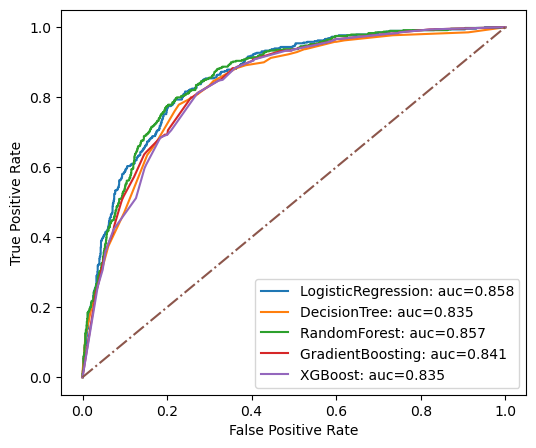

In [40]:
# Plot the ROC curves and compare
plt.figure(figsize=(6,5))
for i in range(len(roc_df)):
    plt.plot(roc_df.iloc[i].fpr,roc_df.iloc[i].tpr,label='{}: auc={}'.format(roc_df.iloc[i,0],roc_df.iloc[i,3]))
plt.plot([0,1],[0,1],'-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


<font size = 4>**Comparing the ROC curves and AUC values, the difference is very little, both logistic recression model and random forest model get a good auc score.**</font>

### 3.3.1 Method 2 - Use SMOTE-ENN 

<font size = 4> **SMOTE** is an oversampling technique that generates synthetic samples from the minority class. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. 

**ENN** is an undersampling technique by removing instances from both classes that are considered noisy or outliers.

**SMOTE-ENN** is a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. </font>

In [41]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X_resampled, y_resampled=sm.fit_resample(X_train,y_train)

# import and inintialize SMOTEENN and resample the training dataset

In [42]:
# Use the resampled training data to do grid search again, find the model with the best hyperparameter combinations

model_params = {
    
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {}  
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 4, 8],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    
    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic',random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1,0.2]
        }
    },
    
    'SVC': {
        'model': SVC(random_state=42),
        'params':{
            'C':[0.5,1,100],
            'gamma':['scale',1,0.1,0.01,0.001]   
        }
    }
}

results_SMOTEENN = []
Best_Para = []

# Loop through the models and perform grid search
for model_name, mp in model_params.items():

    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='recall')
    grid_search.fit(X_resampled, y_resampled)
    best_model = grid_search.best_estimator_

    results_SMOTEENN = score_summary(model_name,best_model,X_resampled,y_resampled,X_test,y_test,results_SMOTEENN)
    Best_Para.append(grid_search.best_params_)

In [43]:
models_SMOTEENN = pd.DataFrame(results_SMOTEENN).set_index('Model')
models_SMOTEENN.index.names = [None]
models_SMOTEENN['Best_Parameters'] = Best_Para
# Make the results as a table for comparison

models_SMOTEENN

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.905,0.699,0.919,0.885,0.911,0.472,0.915,0.615,0.970,0.853,{}
DecisionTree,0.988,0.706,0.992,0.804,0.987,0.476,0.989,0.598,0.999,0.754,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
RandomForest,0.987,0.718,0.997,0.873,0.980,0.489,0.988,0.627,1.000,0.843,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
GradientBoosting,1.000,0.743,1.000,0.846,1.000,0.517,1.000,0.641,1.000,0.840,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
XGBoost,1.000,0.741,1.000,0.839,1.000,0.515,1.000,0.638,1.000,0.839,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
SVC,0.999,0.738,1.000,0.760,0.998,0.512,0.999,0.612,0.999,0.745,"{'C': 100, 'gamma': 1}"


<font size = 4>From the results, SMOTEENN can also improve the models' performances. However, overfitting is significant for most of the models after the SMOTEENN resampling. Therefore a tuning process on SMOTEENN is performed in the following. 

SMOTEENN is tuned by adjusting resampling strategies.</font>

In [44]:
ratios = [0.6,0.7,0.8,0.9,1,'minority','all','not minority']
# ratio = N_rm/N_M where N_rm is the number of samples in the minority class after resampling 
# and N_M is the number of samples in the majority class.

results_tuneSMOTE=[]

for ratio in ratios:
    sm=SMOTEENN(sampling_strategy=ratio,random_state=42)
    X_resampled, y_resampled=sm.fit_resample(X_train,y_train)
    
    model = RandomForestClassifier(min_samples_split=2,min_samples_leaf = 2, n_estimators=10,max_depth=5,random_state=42)
    model.fit(X_resampled,y_resampled)

    results_tuneSMOTE = score_summary('RandomForest',model,X_resampled,y_resampled,X_test,y_test,results_tuneSMOTE)

#  For each resampling strategies, run the Random Forest model and summarize the metrics VS sampe strategy
    
tuneSMOTE= pd.DataFrame(results_tuneSMOTE).drop(columns = 'Model')
tuneSMOTE['Sample_Strategies']=ratios
tuneSMOTE= tuneSMOTE.set_index('Sample_Strategies')
tuneSMOTE

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc
Sample_Strategies,,,,,,,,,,
0.6,0.941,0.759,0.922,0.797,0.897,0.538,0.909,0.643,0.985,0.844
0.7,0.935,0.751,0.927,0.818,0.909,0.528,0.918,0.642,0.986,0.841
0.8,0.930,0.725,0.938,0.858,0.912,0.497,0.925,0.629,0.983,0.842
0.9,0.927,0.698,0.947,0.885,0.912,0.471,0.929,0.615,0.981,0.844
1,0.932,0.696,0.958,0.906,0.921,0.469,0.939,0.618,0.983,0.844
minority,0.932,0.696,0.958,0.906,0.921,0.469,0.939,0.618,0.983,0.844
all,0.932,0.696,0.958,0.906,0.921,0.469,0.939,0.618,0.983,0.844
not minority,0.981,0.793,0.850,0.449,0.932,0.683,0.889,0.542,0.995,0.843


<font size = 4>Even different resample strategies result in some changes in model performances, the overfitting still existing, therefore, SMOTE-ENN is not suggested as the imbalanced technique in this project. </font>


# 4. Feature Importance Analysis

## 4.0 Use RandomForest to see Feature importance 

<font size = 4> From the previous model comparison, Random Forest and Logistic Regression models both work well for this case. We would use Random Forest to do the Feature importance analysis in order to find the most important factors resulting customer churn.</font>

In [45]:
model = RandomForestClassifier(min_samples_split=2,min_samples_leaf=2, n_estimators=10,max_depth=5,
                               class_weight='balanced',random_state=42)
model.fit(X_train,y_train)
importances = model.feature_importances_

# Build Random Forest model and get the feature importances 

Text(0, 0.5, 'Features')

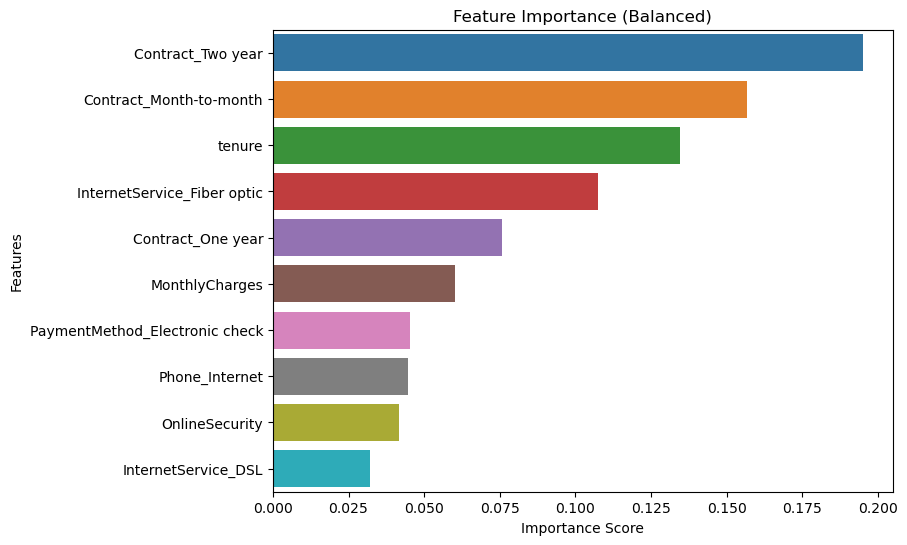

In [46]:
feature_importance_RF = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame to make it easier to visualize, show the top 10 important features
feature_importance_RF = feature_importance_RF.sort_values(by='Importance', ascending=False)[:10]
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_RF)
plt.title('Feature Importance (Balanced)')
plt.xlabel('Importance Score')
plt.ylabel('Features')

## 4.1 Alternative method for see Feature importance_ SHAP

<font size = 4> **SHAP** provides a way to attribute the prediction of an individual instance to its features, offering insights into how each feature contributes to the model's output.</font>

In [47]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


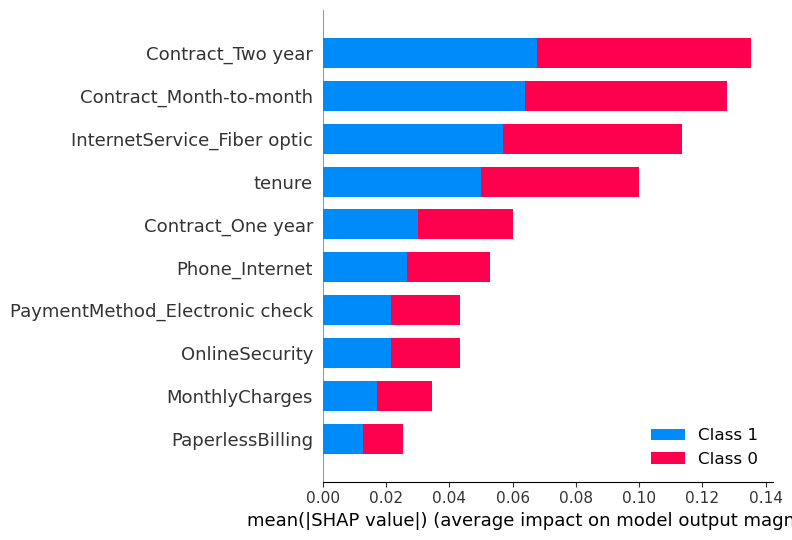

In [48]:
shap.summary_plot(shap_values, X_test,max_display=10)

<font size = 4> **To compare and summarize the important features from random forest built-in function and SHAP:**

1. 'Contract' type is a significant factor in determining the customer churn, where custmers with month-to-month contracts are of high probability to churn, as analyzed in EDA.

2. 'Tenure month' is the second important, and customers with less than 2 years services get high probability to churn. 

3. 'Fiber optic' as an 'Internet Service' option is supprisely found in the top 4 important features. The churn rate for using Fiber optic is found to be as high as 1297/(1298+1799)= 42% </font>


In [49]:
df[df['InternetService']=='Fiber optic'].Churn.value_counts()

No     1799
Yes    1297
Name: Churn, dtype: int64

<font size = 4>**Based on the results, some actionable suggestions are provided for marketing team:**

1. For the month-to-month customers, provide them promotion for signing 1-year or 2-year contract, e.g., yearly payment discount, comparing with monthly payments
2. For new signup customers, give promotion on the first 2-year contract to keep them staying beyond more than 2 years, e.g., some welcome bonus or discount. 
3. Provide discount on Fiber optic or get it bundled with other services at the original price to make it higher cost performance. </font>